# **Лабораторна робота №4**
### з дисципліни **"Інтелектуальний аналіз даних"**

##### **За темою:** "Побудова та оцінювання якості моделей кластеризацiї в Scikit-Learn Python"

##### **Варіант:** 24

##### **Виконав:** Гавлицький Іван, КА-12

##### **Перевірила:** Недашкiвська Н.I.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### **Хід виконання роботи:**
1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї k-середнiх, використати cluster.KMeans i cluster.MiniBatchKMeans.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).
6. Побудувати кiлька альтернативних моделей:
    * шляхом змiни значень параметрiв основної моделi,
    * використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити,
    * задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть кластерiв - параметр.
7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics:
    * Adjusted Rand Index.
    * Calinski-Harabasz Index.
    * Davies-Bouldin Index.
8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв:
    * чи є розбиття стабiльним на пiдвибiрках даних,
9. Вищенаведенi пункти виконати для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних та про швидкодiю методу.
11. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних.

Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.

### ***K-Means***
Алгоритм полягає в довільній ініціалізації центрів кластерів. Та їх ітераційному перерахунку як центрів мас, визначенних на попередній ітерації. Обчислення продовжуються до стабілізації.

#### **Формальний опис алгоритму**
**Дано:**<br>
$I = \{i_1, i_2, ..., i_n\}$ - множина об'єктів даних,<br> де $i_j \in \mathbb{R}^m, j = 1, ..., n$

**Ініціалізація:**
* $d(x, y)$ - міра близькості (подібності) об'єктів
* $\sigma$ - точність
* $l := 0$ - номер ітерації
* $g \in [2, n]$ - кількість кластерів
* $c_k \in \mathbb{R}^m, \ k = 1, ..., g$ - центри кластерів
* матриці розбиття $U$<br>
$$u_{kj} = 
\begin{cases}
    1, d(i_j, c_k) = \min_{l=1,...,g}d(i_j, c_l)\\
    0, else
\end{cases}\
\sum_{k=1}^g u_{kj} = 1,\
\sum_{j=1}^n u_{kj} \in (0, n)$$
* $J(I, U, C) = \sum_{k=1}^g \sum_{j=1}^n u_{kj}d(i_j, c_k)$ - цільова функція

**Ітераційний процес:**
1. $l := l+1$
2. $c_k^{(l)} = \frac{\sum_{j=1}^n u_{kj}^{(l-1)}i_j}{\sum_{j=1}^n u_{kj}^{(l-1)}}\ k=1,...,g$
3. $u_{kj}^{(l)} = 
\begin{cases}
    1, d(i_j, c_k^{(l)}) = \min_{q=1,...,g}d(i_j, c_q^{(l)})\\
    0, else
\end{cases}$
4. $J^{(l)} = J(I, U^{(l)}, C^{(l)})$ <br>

Продовжуємо поки $||J^{(l)} - J^{(l-1)}|| < \sigma$.

#### **Недоліки алгоритму**
* необхідно апріорно задати кількість кластерів;
* необхідно задати початкове розбиття;
* великий розмір простору розбиття (внаслідок дискретності матриці розбиття).

#### ***Mini Batch K-Means***
Модифікація алгоритму, полягає в розгляді лише підвибірки даних (зазвичай обирається випадковим чином) на кожній ітерації.


### **Метрики якості:**

#### ***Adjusted Rand Index***
**Rand Index:**<br>
Нехай $E$ – множина з $n_E$ об’єктів; $X$ ($r$ кластерів) і $Y$ ($s$ кластерів) – два результати
кластеризації цих об’єктів.<br>
Визначимо:<br>
* $a$ – кількість пар об’єктів з $E$, які знаходяться **в одному** кластері в $X$ і **в одному** кластері $Y$
* $b$ – кількість пар об’єктів з $E$, які знаходяться **в різних** кластерах в $X$ і **в різних** кластерах в $Y$
* $c$ – кількість пар об’єктів з $E$, які знаходяться **в одному** кластері в $X$ і **в різних** кластерах в $Y$
* $d$ – кількість пар об’єктів з $E$, які знаходяться **в різних** кластерах в $X$ і **в одному** кластері $Y$

Тоді *Rand Index* визначається як:
$$RI = \frac{a + b}{a + b + c + d}$$

Значення суми $(a + b)$ можна розглядати як кількість згод між $X$ та $Y$, а $(c + d)$ як кількість розбіжностей.<br>
Оскільки знаменник – це загальна кількість пар, індекс $RI$ представляє частоту появи згод в загальній кількості пар або ймовірність того, що $X$ та $Y$ узгоджуються на випадково обраній парі.<br><br>
Індекс приймає значення від 0 до 1, де 0 вказує, що дві кластеризації даних не узгоджуються по жодній парі об’єктів, а 1 вказує, що дві кластеризації абсолютно однакові.<br><br>
**Adjusted Rand Index:**<br>
Індекс $RI$ не гарантує отримання значення, близького до 0,0 при випадковій розмітці. Скоригований індекс RI коригує випадковість і визначає такий базовий рівень.<br>
ARI використовує **модель перестановок для кластеризації**: кількість та розмір кластерів фіксовані, далі генеруються всі випадкові маркування шляхом перестановок елементів між фіксованими кластерами.<br>
Розраховується очікуване значення $\mathbb{E}(RI)$, і визначається скоригований індекс Ренда наступним чином:
$$ARI = \frac{RI - \mathbb{E}(RI)}{\max(RI) - \mathbb{E}(RI)}$$<br>

**Переваги:**<br>
1. Інтерпретованість: некоригований індекс $RI$ пропорційний до кількості пар об'єктів, мітки яких однакові в *labels_pred* і *labels_true* або різні в обох *labels_pred* і *labels_true*.
2. На випадкових (рівномірно розподілених) значеннях міток, скоригований показник $ARI$ близький до нуля для будь-якого значення *n_clusters* і *n_samples* (що невірно, наприклад, для нескоригованого індексу $RI$ або показника $V-measure$).
3. Обмежений діапазон: нижчі значення $RI$ та $ARI$ вказують на різні маркування, схожі кластеризації мають високе значення $RI$ та $ARI$. Діапазон оцінок для $RI$ становить [0, 1]. Діапазон оцінок для $ARI$ становить [-1, 1].
4. Немає обмежень на структуру кластера. Індекси $RI$ та $ARI$ можуть використовуватися для порівняння всіх видів алгоритмів кластеризації.

**Недоліки:**<br>
1. Індекс Ренда (скоригований чи некоригований) вимагає розмічених даних, тобто знання істинних класів, які майже ніколи не доступні на практиці або вимагають ручної розмітки, яка виконується людьми, ассесорами як в умовах контрольованого навчання.
2. $ARI$ часто близький до 1,0, навіть якщо самі кластеризації суттєво відрізняються. Це можна зрозуміти, інтерпретуючи індекс Ренда як точність (*accuracy*) маркування пар елементів в результаті кластеризації. На практиці часто виникає ситуація коли більшості пар елементів присвоюються різні мітки пар як в прогнозній так і в істинній кластеризації, що призводить до високої частки узгоджених міток пар, і як наслідок до високого $ARI$.
<br><br>

#### ***Calinski-Harabasz Index***
Для деякої вибірки $E$ розміру $n_E$, розділеної на $k$ кластерів, індекс Калінські-Харабаса визначається як відношення середньої *міжкластерної дисперсії* та дисперсії об'єктів всередині класів:<br>
$$s = \frac{BCSS}{WCSS} \frac{n_E-k}{k-1}$$<br>
де BCSS (Between-Cluster Sum of Squares) та WCSS (Within-Cluster Sum of Squares) обчислюються наступним чином:<br>
$$BCSS = \sum_{q=1}^k n_q ||c_q-c_E||^2$$
$$WCSS = \sum_{q=1}^k \sum_{x \in C_q} ||x-c_q||^2$$<br>
* $C_q$ - множина об'єктів кластеру $q$
* $c_q$ - центр кластеру
* $c_E$ - центр вибірки $E$
* $n_q$ - потужність множини $C_q$

**Переваги:**<br>
* Значення індексу вище, коли кластери щільні та добре відокремлені, що відповідає стандартному концепту кластера.
* Метрика швидко обчислюється.
<br><br>

#### ***Davies-Bouldin Index***
Індекс визначається як середнє схожості між кожним кластером $C_q$ та найбільш схожим на нього $C_{p}$. У контексті цього індексу, схожість визначається як $R_{qp}$:
$$R_{qp} = \frac{s_q + s_p}{d_{qp}}$$<br>
$$s_q = \left(\frac{1}{n} \sum_{x \in C_q} ||x-c_q||^2 \right)^{\frac{1}{2}}$$
$$d_{qp}=||c_q - c_p||$$

Таким чином, *Davies-Bouldin Index* визначається як:
$$DB = \frac{1}{k} \sum_{q=1}^k \max_{p \neq q}R_{qp}$$

**Переваги:**<br>
* Достатньо просте обчислення.

**Недоліки:**<br>
* Використання відстані між центроїдами обмежує метрику відстані до евклідового простору.

##### **Набір 1:**

In [33]:
from sklearn.datasets import make_moons

X, y_true = make_moons(
    n_samples=2000,
    noise=0.12,
    random_state=42
)

Представимо дані графічно.

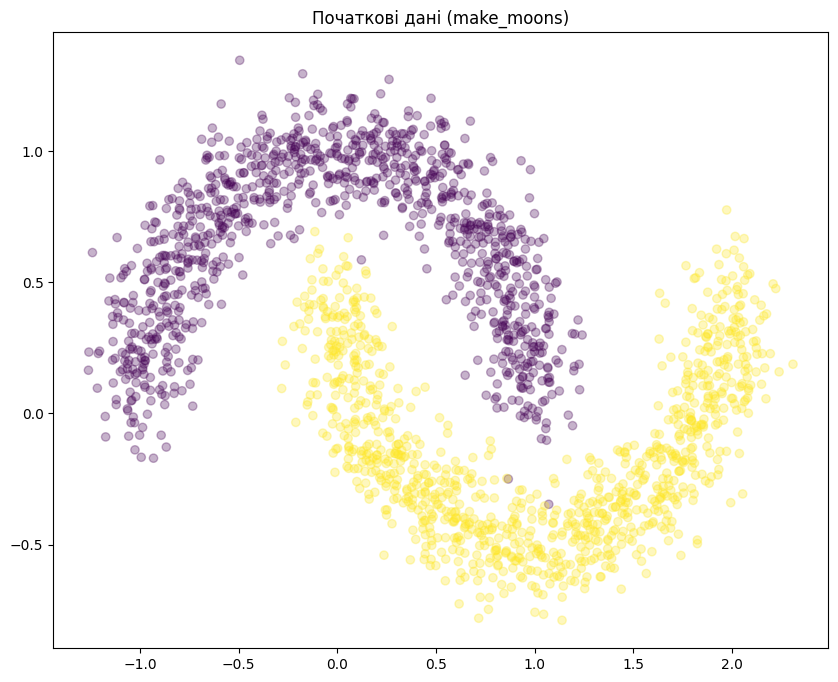

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Початкові дані (make_moons)')
ax.scatter(X[:, 0], X[:, 1], c=y_true, alpha=0.3)
fig.show()

Побудуємо модель кластеризацiї ***KMeans***

In [35]:
from sklearn.cluster import KMeans, MiniBatchKMeans

model = KMeans(
    n_clusters = 2,
    random_state=42,
    n_init='auto'
)

Виконаємо кластеризацію даних та представимо результат графічно.

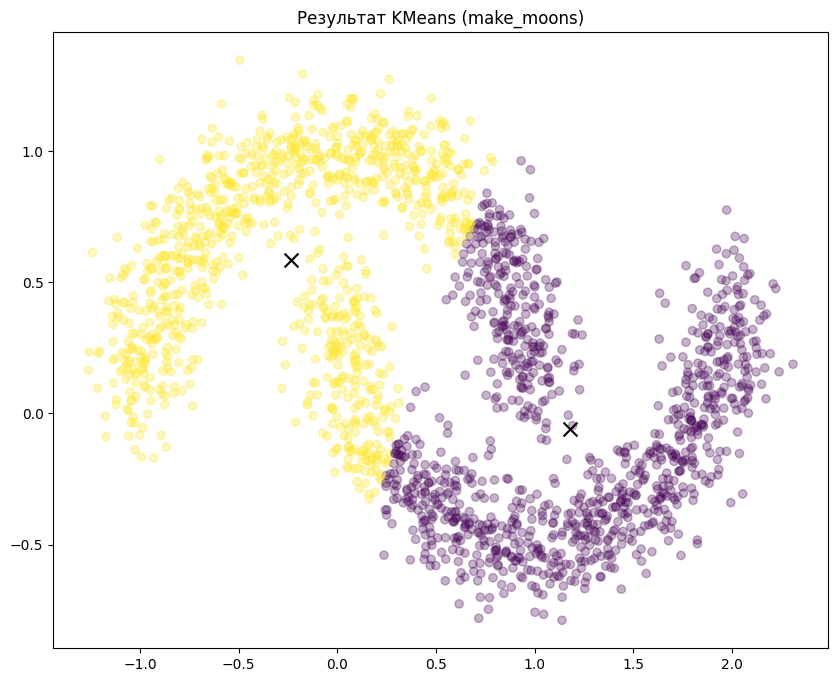

In [36]:
kmeans_labels = model.fit_predict(X)
kmeans_centers = model.cluster_centers_


fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Результат KMeans (make_moons)')
ax.scatter(X[:, 0], X[:, 1], c=kmeans_labels, alpha=0.3)
ax.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', s=100, marker='x')

fig.show()

Розрахуємо час кластеризації та оцінемо швидкість на великих наборах.

In [37]:
for n in [10**3, 10**4, 10**5, 10**6, 10**7]:
    X_n, _ = make_moons(
        n_samples=n,
        noise=0.15,
        random_state=42
    )
    
    print(f'Розмір набору: {n}')
    %timeit model.fit_predict(X_n)
    
    print()

Розмір набору: 1000
3.89 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Розмір набору: 10000
125 ms ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Розмір набору: 100000
155 ms ± 5.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Розмір набору: 1000000
394 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Розмір набору: 10000000
3.25 s ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



Можна побачити, що залежність швидкості від розміру набору даних не більш, ніж лінійна.

Обчислимо наступні метрики якостi кластеризацiї:
* Adjusted Rand Index.
* Calinski-Harabasz Index.
* Davies-Bouldin Index.

In [38]:
from sklearn.metrics import adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score

def calc_metrics(X, y_true, model_labels):
    adjusted_rand_index = adjusted_rand_score(y_true, model_labels)
    calinski_harabasz_index = calinski_harabasz_score(X, model_labels)
    davies_bouldin_index = davies_bouldin_score(X, model_labels)
    
    output = f'Adjusted Rand Index: {adjusted_rand_index}\n'
    output += f'Calinski-Harabasz Index: {calinski_harabasz_index}\n'
    output += f'Davies-Bouldin index: {davies_bouldin_index}'
    
    return output
    
print(calc_metrics(X, y_true, kmeans_labels))

Adjusted Rand Index: 0.2516301130567435
Calinski-Harabasz Index: 2866.343180545466
Davies-Bouldin index: 0.7867680570179622


Продемонструємо результати для кількох альтернативних моделей.

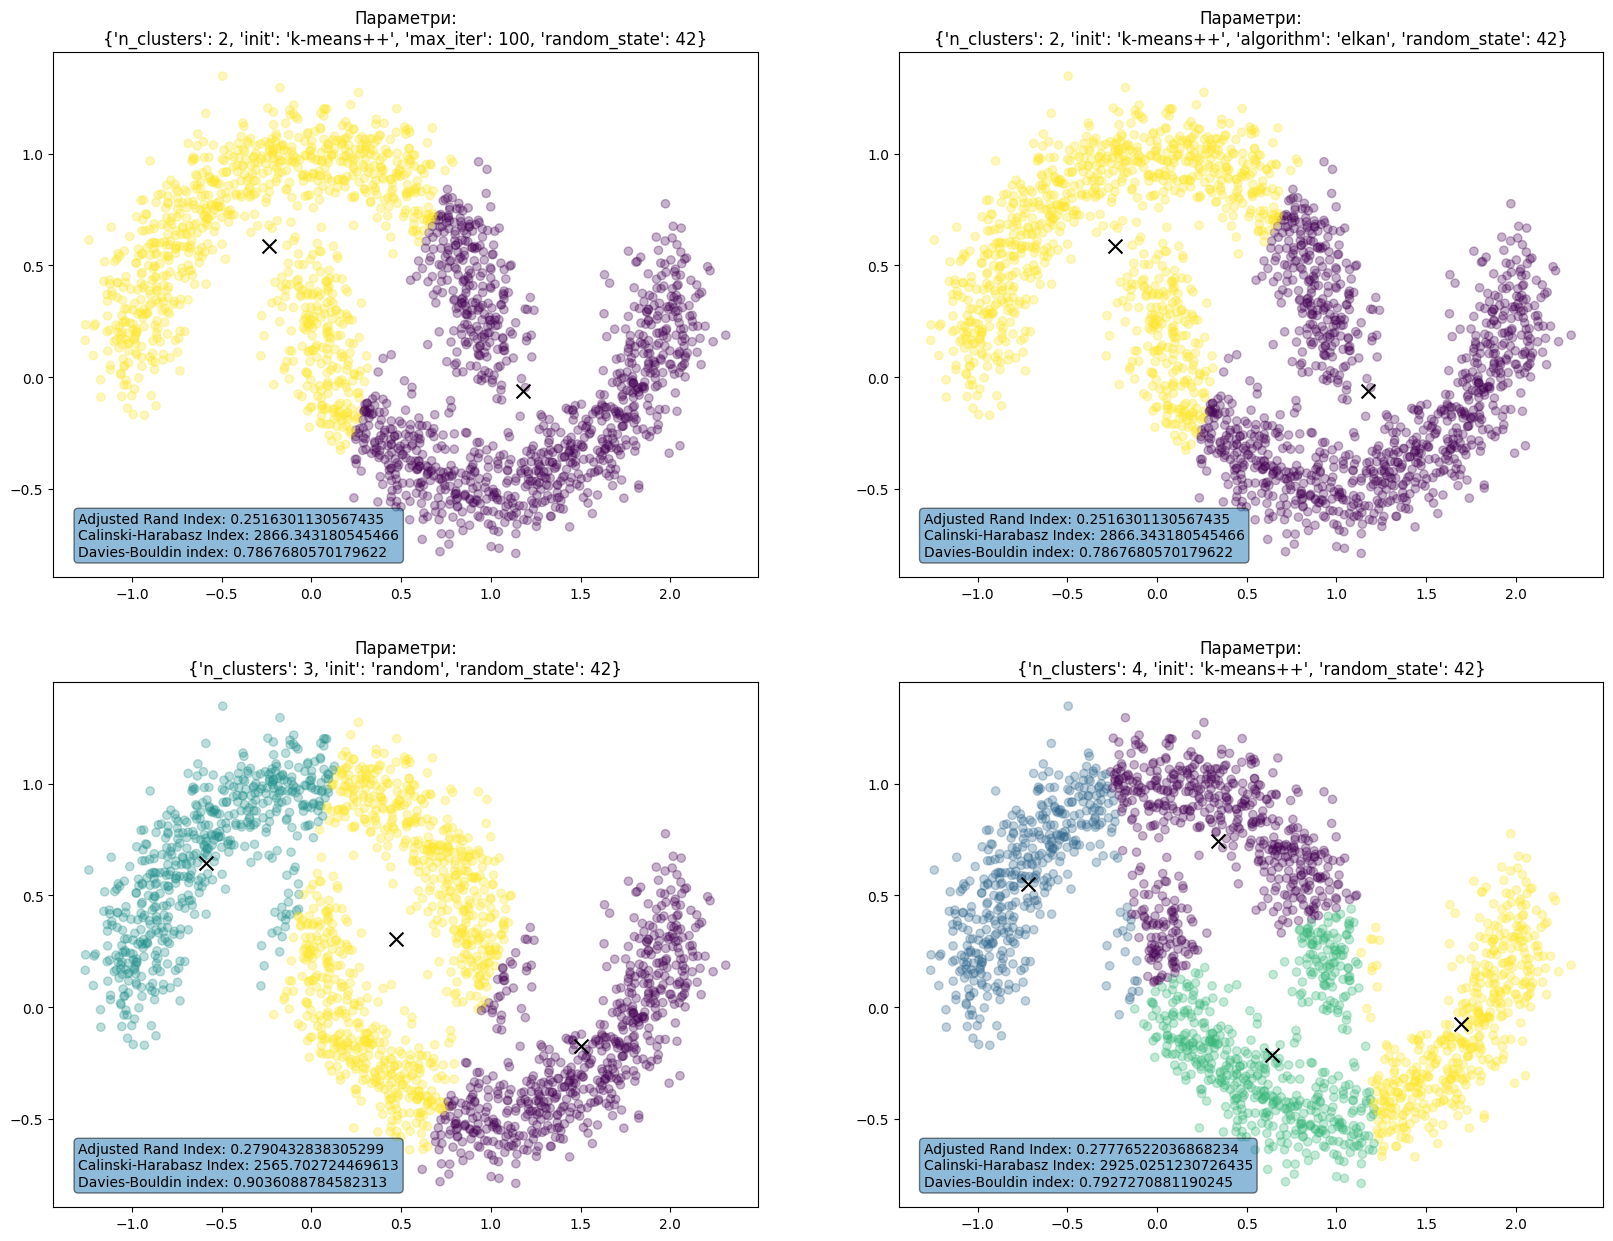

In [39]:
from sklearn.base import clone

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()

temp_model = clone(model)
params_list = [
    {'n_clusters': 2, 'init': 'k-means++', 'max_iter': 100, 'random_state': 42},
    {'n_clusters': 2, 'init': 'k-means++', 'algorithm': "elkan", 'random_state': 42},
    {'n_clusters': 3, 'init': 'random', 'random_state': 42},
    {'n_clusters': 4, 'init': 'k-means++', 'random_state': 42},
]

for ii, params in enumerate(params_list):
    temp_model.set_params(**params)
    
    kmeans_labels = temp_model.fit_predict(X)
    kmeans_centers = temp_model.cluster_centers_
    kmeans_metrics = calc_metrics(X, y_true, kmeans_labels)

    axs[ii].set_title(f'Параметри:\n{params}')
    axs[ii].scatter(X[:, 0], X[:, 1], c=kmeans_labels, alpha=0.3)
    axs[ii].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', s=100, marker='x')
    
    axs[ii].text(-1.3, -0.8, kmeans_metrics, bbox={'boxstyle': 'round', 'alpha': 0.5})

fig.show()
    

Одержали доволі погані результати. Це зрозуміло, адже K-Means базовий алгоритм, який якісно розпізнає лише сферичні вибірки. Також перевіряти на стабільність на підвибірках недоцільно, бо алгоритм працює погано і на цілій вибірці.

Оскільки, із врахуванням представленних вище результатів, говорити про точність сенсу небагато. Проведемо порівяння ***KMeans*** i ***MiniBatchKMeans*** лише на контексті швидкодії.

In [40]:
from sklearn.cluster import MiniBatchKMeans

minibatch_model = MiniBatchKMeans(
    n_clusters=2,
    n_init='auto',
    random_state=42
)

In [41]:
for n in [10**4, 10**5, 10**6, 10**7]:
    X_n, _ = make_moons(
        n_samples=n,
        noise=0.15,
        random_state=42
    )
    
    print(f'Розмір набору: {n}')
    %timeit minibatch_model.fit_predict(X_n)
    
    print()

Розмір набору: 10000
11.2 ms ± 4.56 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Розмір набору: 100000
15.5 ms ± 362 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Розмір набору: 1000000
33.4 ms ± 381 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Розмір набору: 10000000
6.73 s ± 606 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



Спостерігаємо значний приріст швидкості, за виключенням розміру вибірки $10^7$.

##### **Набір 2:**

In [42]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(
    n_samples=20000, 
    n_features=2,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1
)

Представимо дані графічно.

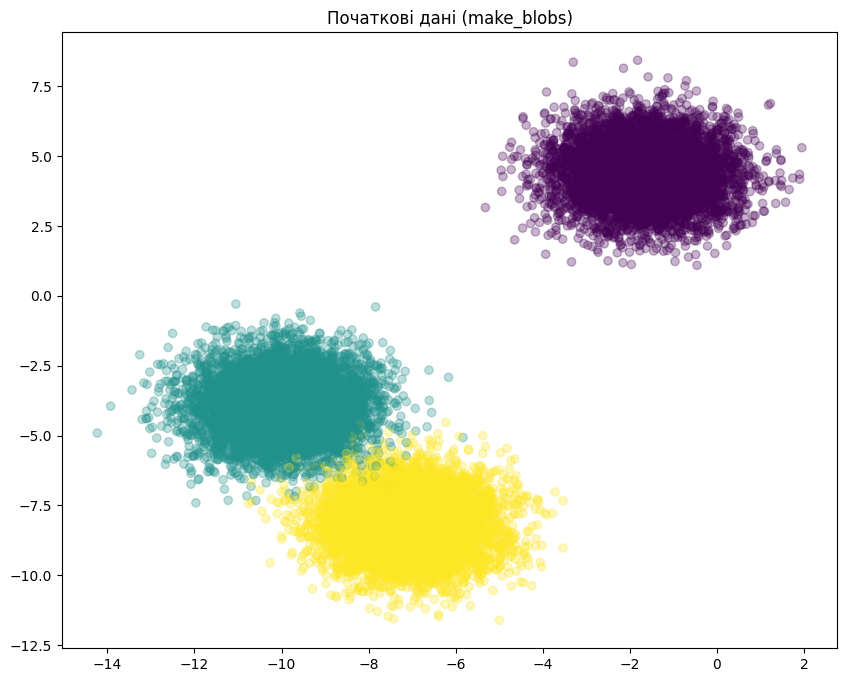

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Початкові дані (make_blobs)')
ax.scatter(X[:, 0], X[:, 1], c=y_true, alpha=0.3)
fig.show()

Виконаємо кластеризацію даних та представимо результат графічно.

In [44]:
model = KMeans(
    n_clusters = 3,
    random_state=42,
    n_init='auto'
)

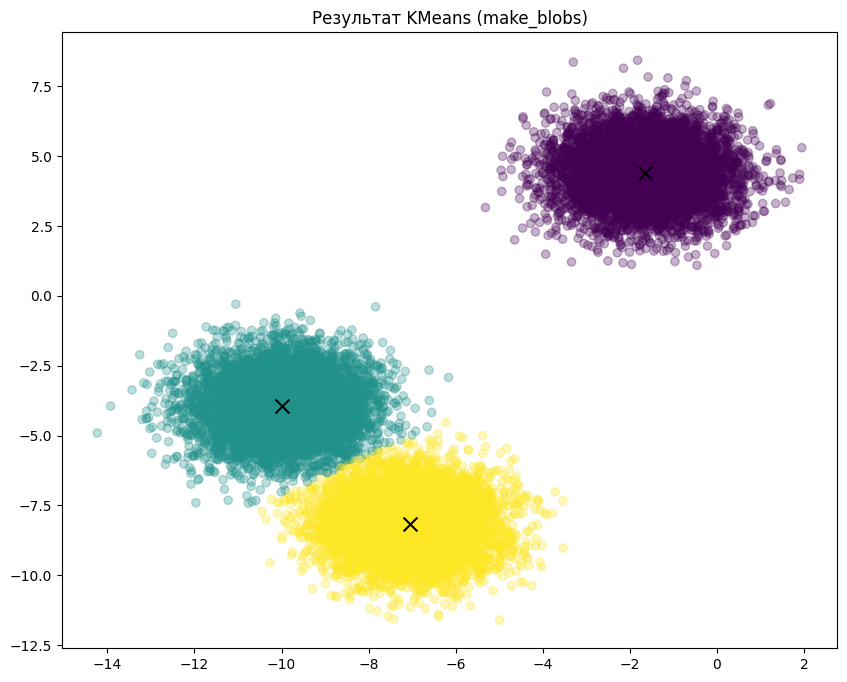

In [45]:
kmeans_labels = model.fit_predict(X)
kmeans_centers = model.cluster_centers_


fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Результат KMeans (make_blobs)')
ax.scatter(X[:, 0], X[:, 1], c=kmeans_labels, alpha=0.3)
ax.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', s=100, marker='x')

fig.show()

Розрахуємо час кластеризації та оцінемо швидкість на великих наборах.

In [46]:
for n in [2*10**4, 10**5, 10**6, 10**7]:
    X_n, _ = make_blobs(
        n_samples=n, 
        n_features=2,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=True,
        random_state=1
    )
    
    print(f'Розмір набору: {n}')
    %timeit model.fit_predict(X_n)
    
    print()

Розмір набору: 20000
98.8 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Розмір набору: 100000
133 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Розмір набору: 1000000
408 ms ± 6.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Розмір набору: 10000000
3.36 s ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



Обчислимо наступні метрики якостi кластеризацiї:
* Adjusted Rand Index.
* Calinski-Harabasz Index.
* Davies-Bouldin Index.

In [47]:
print(calc_metrics(X, y_true, kmeans_labels))

Adjusted Rand Index: 0.988960783105303
Calinski-Harabasz Index: 197360.4357942429
Davies-Bouldin index: 0.39587875587386456


Продемонструємо результати для кількох альтернативних моделей.

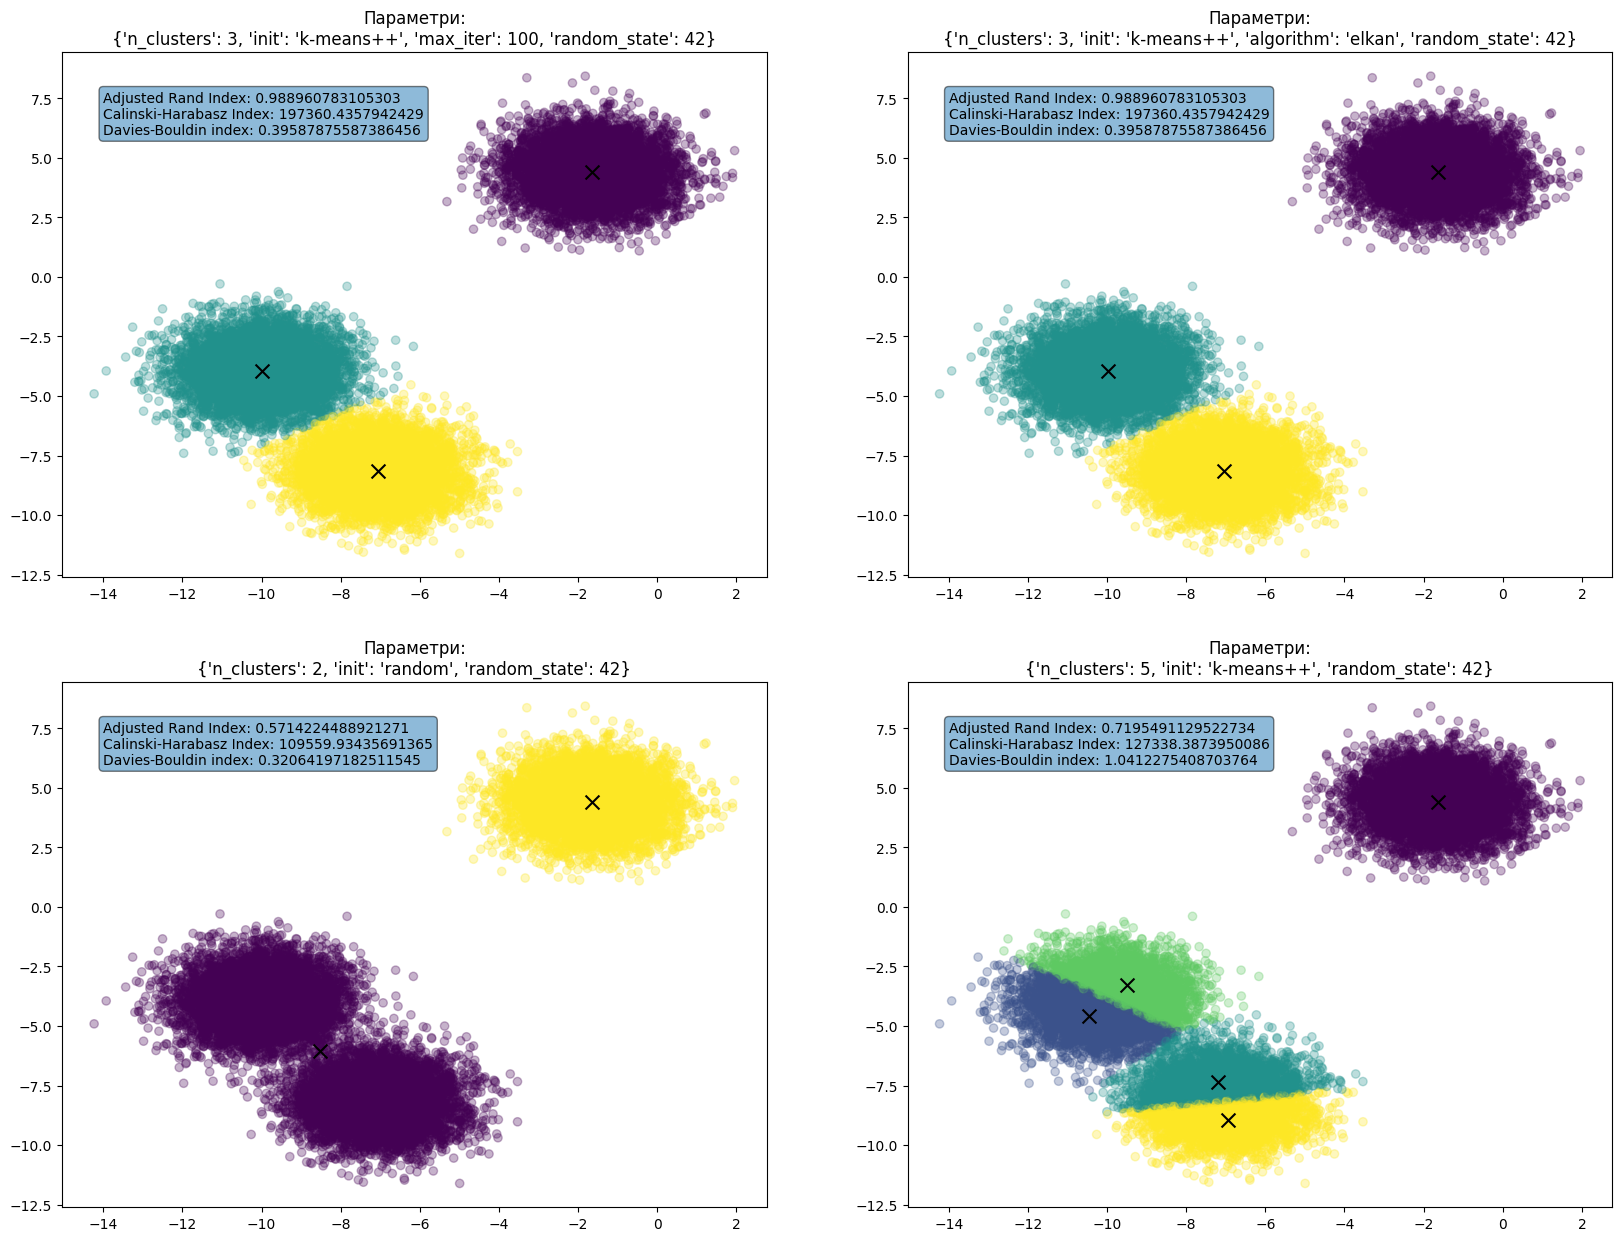

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()

temp_model = clone(model)
params_list = [
    {'n_clusters': 3, 'init': 'k-means++', 'max_iter': 100, 'random_state': 42},
    {'n_clusters': 3, 'init': 'k-means++', 'algorithm': "elkan", 'random_state': 42},
    {'n_clusters': 2, 'init': 'random', 'random_state': 42},
    {'n_clusters': 5, 'init': 'k-means++', 'random_state': 42},
]

for ii, params in enumerate(params_list):
    temp_model.set_params(**params)
    
    kmeans_labels = temp_model.fit_predict(X)
    kmeans_centers = temp_model.cluster_centers_
    kmeans_metrics = calc_metrics(X, y_true, kmeans_labels)

    axs[ii].set_title(f'Параметри:\n{params}')
    axs[ii].scatter(X[:, 0], X[:, 1], c=kmeans_labels, alpha=0.3)
    axs[ii].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', s=100, marker='x')
    
    axs[ii].text(-14, 6, kmeans_metrics, bbox={'boxstyle': 'round', 'alpha': 0.5})

fig.show()
    

Перевіримо, чи є розбиття стабiльним на пiдвибiрках даних.<br>
Розглянемо підвибірку, яка в 100 разів менше початкової.

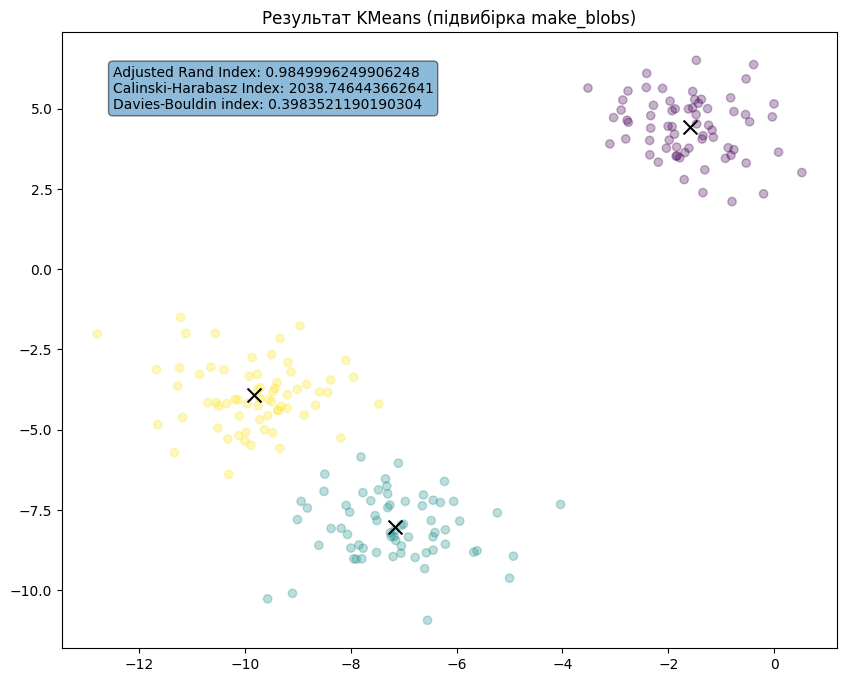

In [49]:
X_mini, y_true_mini = make_blobs(
    n_samples=200, 
    n_features=2,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1
)

kmeans_labels_mini = model.fit_predict(X_mini)
kmeans_centers_mini = model.cluster_centers_
kmeans_metrics_mini = calc_metrics(X_mini, y_true_mini, kmeans_labels_mini)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Результат KMeans (підвибірка make_blobs)')
ax.scatter(X_mini[:, 0], X_mini[:, 1], c=kmeans_labels_mini, alpha=0.3)
ax.scatter(kmeans_centers_mini[:, 0], kmeans_centers_mini[:, 1], c='black', s=100, marker='x')
ax.text(-12.5, 5, kmeans_metrics_mini, bbox={'boxstyle': 'round', 'alpha': 0.5})


fig.show()

Бачимо, що результати метрик майже не стали гірше, отже, розбиття є стабільним.

порівяємо ***KMeans*** i ***MiniBatchKMeans***.

In [50]:
minibatch_model = MiniBatchKMeans(
    n_clusters=3,
    n_init='auto',
    random_state=42
)

Розрахуємо час кластеризації для різного розміру вибірки.

In [51]:
for n in [2*10**4, 10**5, 10**6, 10**7]:
    X_n, _ = make_blobs(
        n_samples=n, 
        n_features=2,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=True,
        random_state=1
    )
    
    print(f'Розмір набору: {n}')
    %timeit minibatch_model.fit_predict(X_n)
    
    print()

Розмір набору: 20000
26 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Розмір набору: 100000
19.6 ms ± 369 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Розмір набору: 1000000
894 ms ± 457 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Розмір набору: 10000000
316 ms ± 4.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



Обчислимо метрики якості та зобразимо розбиття графічно.

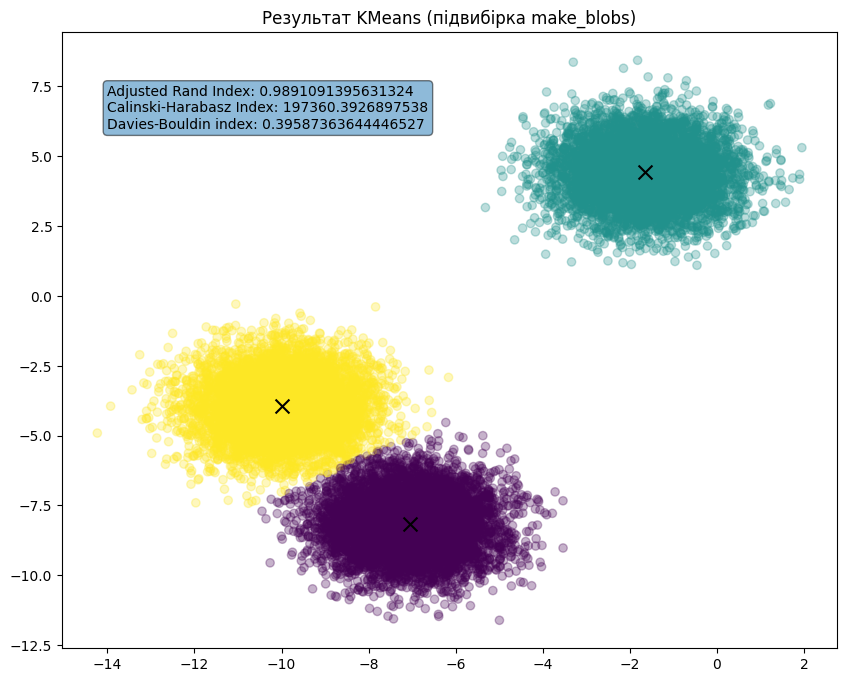

In [52]:
minibatch_kmeans_labels = minibatch_model.fit_predict(X)
minibatch_kmeans_centers = minibatch_model.cluster_centers_
minibatch_kmeans_metrics = calc_metrics(X, y_true, minibatch_kmeans_labels)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Результат KMeans (підвибірка make_blobs)')
ax.scatter(X[:, 0], X[:, 1], c=minibatch_kmeans_labels, alpha=0.3)
ax.scatter(minibatch_kmeans_centers[:, 0], minibatch_kmeans_centers[:, 1], c='black', s=100, marker='x')
ax.text(-14, 6, minibatch_kmeans_metrics, bbox={'boxstyle': 'round', 'alpha': 0.5})

fig.show()

Значного зменьшення метрик не спостерігаємо, приріст швидкості наявний.

##### **Висновки:**
- алгоритм є дуже швидким на великих вибірках
- може розпізнати лише дані сферичної форми, тому будь-які покращення алгоритму для першої вибірки не дають результатів. Для другої вибірки будь-який набір параметрів, дає гарний результат, окрім зміни кількості кластерів
- метрики для 1 вибірки дуже погані, на 2 чудові, що логічно
- алгоритм є стабільним на будь-якій підвибірці у випадку другого набору